<a href="https://colab.research.google.com/github/HisakaKoji/test/blob/master/chapter6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/oreilly-japan/deep-learning-from-scratch.git

Cloning into 'deep-learning-from-scratch'...
remote: Enumerating objects: 400, done.
remote: Total 400 (delta 0), reused 0 (delta 0), pack-reused 400
Receiving objects: 100% (400/400), 5.25 MiB | 29.07 MiB/s, done.
Resolving deltas: 100% (206/206), done.


In [0]:
# coding: utf-8
import numpy as np

class SGD:

    """確率的勾配降下法（Stochastic Gradient Descent）"""

    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key] 


class Momentum:

    """Momentum SGD"""

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():                                
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key] 
            params[key] += self.v[key]


class Nesterov:

    """Nesterov's Accelerated Gradient (http://arxiv.org/abs/1212.0901)"""

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.v[key] *= self.momentum
            self.v[key] -= self.lr * grads[key]
            params[key] += self.momentum * self.momentum * self.v[key]
            params[key] -= (1 + self.momentum) * self.lr * grads[key]


class AdaGrad:

    """AdaGrad"""

    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)


class RMSprop:

    """RMSprop"""

    def __init__(self, lr=0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] *= self.decay_rate
            self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)


class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
#params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

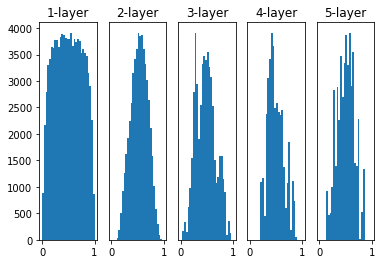

In [8]:
#@title 6.2.2 隠れ層のアクティベーション分布
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100  # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    #w = np.random.randn(node_num, node_num) * 1
    #w = np.random.randn(node_num, node_num) * 0.01
    #w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
===========iteration:0===========
std=0.01:2.302478772316916
Xavier:2.297613731443877
He:2.34208879519936
===========iteration:100===========
std=0.01:2.301715253630505
Xavier:2.230524384368409
He:1.6312317151159021
===========iteration:200===========
std=0.01:2.302875682701429
Xavier:2.075715932280459
He:0.8373172154615125
===========iteration:300===========
std=0.01:2.3018460675582126
Xavier:1.6993552273410695
He:0.5769178846859245
===========iteration:400===========
std=0.01:2.2997625398693566
Xavier:1.2105322390178883
He:0.5535243914492562
===========iteration:500===========
std=0.01:2.3014253858022515
Xavier:0.9225331863714447
He:0.46272433667152224
===========iteration:600===========
std=

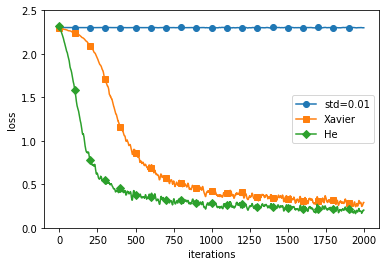

In [10]:
#@title 6.2.4 MNIST デーtアセットによる重み初期値の比較

# coding: utf-8
import os
import sys

sys.path.append('deep-learning-from-scratch')  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

============== 1/16 ==============
epoch:0 | 0.097 - 0.124


deep-learning-from-scratch/common/layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)
deep-learning-from-scratch/common/multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
deep-learning-from-scratch/common/multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


epoch:1 | 0.097 - 0.126
epoch:2 | 0.097 - 0.118
epoch:3 | 0.097 - 0.149
epoch:4 | 0.097 - 0.174
epoch:5 | 0.097 - 0.183
epoch:6 | 0.097 - 0.201
epoch:7 | 0.097 - 0.225
epoch:8 | 0.097 - 0.24
epoch:9 | 0.097 - 0.264
epoch:10 | 0.097 - 0.274
epoch:11 | 0.097 - 0.299
epoch:12 | 0.097 - 0.305
epoch:13 | 0.097 - 0.317
epoch:14 | 0.097 - 0.329
epoch:15 | 0.097 - 0.338
epoch:16 | 0.097 - 0.347
epoch:17 | 0.097 - 0.368
epoch:18 | 0.097 - 0.373
epoch:19 | 0.097 - 0.38


No handles with labels found to put in legend.


============== 2/16 ==============
epoch:0 | 0.117 - 0.089
epoch:1 | 0.097 - 0.074
epoch:2 | 0.097 - 0.121
epoch:3 | 0.097 - 0.151
epoch:4 | 0.097 - 0.164
epoch:5 | 0.097 - 0.193
epoch:6 | 0.097 - 0.213
epoch:7 | 0.097 - 0.232
epoch:8 | 0.097 - 0.246
epoch:9 | 0.097 - 0.269
epoch:10 | 0.097 - 0.286
epoch:11 | 0.097 - 0.312
epoch:12 | 0.097 - 0.316
epoch:13 | 0.097 - 0.341
epoch:14 | 0.097 - 0.358
epoch:15 | 0.097 - 0.385
epoch:16 | 0.097 - 0.389
epoch:17 | 0.097 - 0.407
epoch:18 | 0.097 - 0.436
epoch:19 | 0.097 - 0.447


No handles with labels found to put in legend.


============== 3/16 ==============
epoch:0 | 0.128 - 0.134
epoch:1 | 0.373 - 0.141
epoch:2 | 0.494 - 0.163
epoch:3 | 0.596 - 0.193
epoch:4 | 0.681 - 0.224
epoch:5 | 0.729 - 0.273
epoch:6 | 0.822 - 0.308
epoch:7 | 0.853 - 0.351
epoch:8 | 0.878 - 0.393
epoch:9 | 0.911 - 0.409
epoch:10 | 0.933 - 0.436
epoch:11 | 0.95 - 0.464
epoch:12 | 0.959 - 0.497
epoch:13 | 0.971 - 0.529
epoch:14 | 0.976 - 0.551
epoch:15 | 0.982 - 0.564
epoch:16 | 0.983 - 0.58
epoch:17 | 0.988 - 0.606
epoch:18 | 0.992 - 0.623


No handles with labels found to put in legend.


epoch:19 | 0.991 - 0.632
============== 4/16 ==============
epoch:0 | 0.099 - 0.091
epoch:1 | 0.268 - 0.136
epoch:2 | 0.438 - 0.197
epoch:3 | 0.535 - 0.305
epoch:4 | 0.598 - 0.378
epoch:5 | 0.648 - 0.435
epoch:6 | 0.672 - 0.485
epoch:7 | 0.711 - 0.531
epoch:8 | 0.718 - 0.564
epoch:9 | 0.739 - 0.594
epoch:10 | 0.75 - 0.627
epoch:11 | 0.765 - 0.648
epoch:12 | 0.768 - 0.661
epoch:13 | 0.793 - 0.691
epoch:14 | 0.793 - 0.713
epoch:15 | 0.817 - 0.732
epoch:16 | 0.822 - 0.753
epoch:17 | 0.834 - 0.757
epoch:18 | 0.841 - 0.776


No handles with labels found to put in legend.


epoch:19 | 0.844 - 0.791
============== 5/16 ==============
epoch:0 | 0.108 - 0.091
epoch:1 | 0.113 - 0.134
epoch:2 | 0.12 - 0.296
epoch:3 | 0.127 - 0.408
epoch:4 | 0.136 - 0.486
epoch:5 | 0.133 - 0.563
epoch:6 | 0.146 - 0.61
epoch:7 | 0.162 - 0.647
epoch:8 | 0.184 - 0.685
epoch:9 | 0.203 - 0.719
epoch:10 | 0.224 - 0.753
epoch:11 | 0.219 - 0.775
epoch:12 | 0.226 - 0.791
epoch:13 | 0.248 - 0.811
epoch:14 | 0.279 - 0.815
epoch:15 | 0.311 - 0.828
epoch:16 | 0.332 - 0.842
epoch:17 | 0.345 - 0.851
epoch:18 | 0.355 - 0.859


No handles with labels found to put in legend.


epoch:19 | 0.38 - 0.875
============== 6/16 ==============
epoch:0 | 0.103 - 0.113
epoch:1 | 0.128 - 0.215
epoch:2 | 0.122 - 0.431
epoch:3 | 0.107 - 0.55
epoch:4 | 0.117 - 0.612
epoch:5 | 0.11 - 0.671
epoch:6 | 0.125 - 0.722
epoch:7 | 0.119 - 0.749
epoch:8 | 0.116 - 0.779
epoch:9 | 0.112 - 0.811
epoch:10 | 0.117 - 0.826
epoch:11 | 0.111 - 0.84
epoch:12 | 0.125 - 0.864
epoch:13 | 0.115 - 0.882
epoch:14 | 0.116 - 0.886
epoch:15 | 0.117 - 0.898
epoch:16 | 0.116 - 0.903
epoch:17 | 0.112 - 0.912
epoch:18 | 0.114 - 0.917


No handles with labels found to put in legend.


epoch:19 | 0.13 - 0.928
============== 7/16 ==============
epoch:0 | 0.097 - 0.103
epoch:1 | 0.116 - 0.281
epoch:2 | 0.116 - 0.605
epoch:3 | 0.117 - 0.722
epoch:4 | 0.117 - 0.764
epoch:5 | 0.117 - 0.798
epoch:6 | 0.117 - 0.819
epoch:7 | 0.117 - 0.854
epoch:8 | 0.117 - 0.886
epoch:9 | 0.117 - 0.906
epoch:10 | 0.117 - 0.928
epoch:11 | 0.117 - 0.946
epoch:12 | 0.117 - 0.953
epoch:13 | 0.117 - 0.965
epoch:14 | 0.117 - 0.973
epoch:15 | 0.117 - 0.984
epoch:16 | 0.117 - 0.984
epoch:17 | 0.116 - 0.989
epoch:18 | 0.116 - 0.991


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.991
============== 8/16 ==============
epoch:0 | 0.1 - 0.14
epoch:1 | 0.117 - 0.396
epoch:2 | 0.116 - 0.696
epoch:3 | 0.117 - 0.805
epoch:4 | 0.117 - 0.859
epoch:5 | 0.117 - 0.887
epoch:6 | 0.117 - 0.918
epoch:7 | 0.117 - 0.933
epoch:8 | 0.117 - 0.952
epoch:9 | 0.117 - 0.967
epoch:10 | 0.117 - 0.975
epoch:11 | 0.117 - 0.99
epoch:12 | 0.117 - 0.991
epoch:13 | 0.117 - 0.994
epoch:14 | 0.117 - 0.997
epoch:15 | 0.117 - 0.999
epoch:16 | 0.117 - 0.997
epoch:17 | 0.117 - 0.999
epoch:18 | 0.117 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.117 - 1.0
============== 9/16 ==============
epoch:0 | 0.117 - 0.114
epoch:1 | 0.117 - 0.492
epoch:2 | 0.117 - 0.714
epoch:3 | 0.117 - 0.788
epoch:4 | 0.117 - 0.889
epoch:5 | 0.117 - 0.937
epoch:6 | 0.117 - 0.953
epoch:7 | 0.117 - 0.972
epoch:8 | 0.117 - 0.986
epoch:9 | 0.117 - 0.992
epoch:10 | 0.117 - 0.998
epoch:11 | 0.117 - 0.999
epoch:12 | 0.117 - 0.998
epoch:13 | 0.117 - 0.999
epoch:14 | 0.117 - 0.999
epoch:15 | 0.117 - 1.0
epoch:16 | 0.117 - 0.999
epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.116 - 0.16
epoch:1 | 0.105 - 0.574
epoch:2 | 0.105 - 0.776
epoch:3 | 0.117 - 0.825
epoch:4 | 0.117 - 0.872
epoch:5 | 0.117 - 0.915
epoch:6 | 0.117 - 0.777
epoch:7 | 0.117 - 0.956
epoch:8 | 0.117 - 0.888
epoch:9 | 0.117 - 0.972
epoch:10 | 0.117 - 0.99
epoch:11 | 0.117 - 0.995
epoch:12 | 0.117 - 0.996
epoch:13 | 0.117 - 0.999
epoch:14 | 0.117 - 0.998
epoch:15 | 0.117 - 1.0
epoch:16 | 0.117 - 0.999
epoch:17 | 0.117 - 0.998
epoch:18 | 0.117 - 0.995


No handles with labels found to put in legend.


epoch:19 | 0.117 - 1.0
============== 11/16 ==============
epoch:0 | 0.099 - 0.115
epoch:1 | 0.117 - 0.537
epoch:2 | 0.117 - 0.653
epoch:3 | 0.117 - 0.763
epoch:4 | 0.117 - 0.857
epoch:5 | 0.117 - 0.908
epoch:6 | 0.117 - 0.94
epoch:7 | 0.117 - 0.936
epoch:8 | 0.117 - 0.949
epoch:9 | 0.117 - 0.967
epoch:10 | 0.117 - 0.984
epoch:11 | 0.117 - 0.985
epoch:12 | 0.117 - 0.992
epoch:13 | 0.117 - 0.99
epoch:14 | 0.117 - 0.991
epoch:15 | 0.117 - 0.993
epoch:16 | 0.117 - 0.993
epoch:17 | 0.117 - 0.91
epoch:18 | 0.117 - 0.961


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.995
============== 12/16 ==============
epoch:0 | 0.097 - 0.098
epoch:1 | 0.116 - 0.324
epoch:2 | 0.117 - 0.603
epoch:3 | 0.117 - 0.541
epoch:4 | 0.117 - 0.676
epoch:5 | 0.117 - 0.663
epoch:6 | 0.117 - 0.653
epoch:7 | 0.117 - 0.661
epoch:8 | 0.117 - 0.702
epoch:9 | 0.117 - 0.71
epoch:10 | 0.117 - 0.709
epoch:11 | 0.117 - 0.708
epoch:12 | 0.117 - 0.709
epoch:13 | 0.117 - 0.707
epoch:14 | 0.117 - 0.709
epoch:15 | 0.117 - 0.7
epoch:16 | 0.117 - 0.713
epoch:17 | 0.117 - 0.793
epoch:18 | 0.117 - 0.798


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.805
============== 13/16 ==============
epoch:0 | 0.099 - 0.101
epoch:1 | 0.117 - 0.257
epoch:2 | 0.117 - 0.528
epoch:3 | 0.117 - 0.647
epoch:4 | 0.117 - 0.667
epoch:5 | 0.117 - 0.666
epoch:6 | 0.117 - 0.685
epoch:7 | 0.117 - 0.677
epoch:8 | 0.117 - 0.7
epoch:9 | 0.116 - 0.699
epoch:10 | 0.116 - 0.787
epoch:11 | 0.116 - 0.805
epoch:12 | 0.116 - 0.769
epoch:13 | 0.116 - 0.748
epoch:14 | 0.116 - 0.72
epoch:15 | 0.116 - 0.71
epoch:16 | 0.116 - 0.765
epoch:17 | 0.116 - 0.771
epoch:18 | 0.116 - 0.87


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.888
============== 14/16 ==============
epoch:0 | 0.094 - 0.113
epoch:1 | 0.117 - 0.282
epoch:2 | 0.117 - 0.304
epoch:3 | 0.117 - 0.492
epoch:4 | 0.117 - 0.507
epoch:5 | 0.117 - 0.513
epoch:6 | 0.117 - 0.504
epoch:7 | 0.117 - 0.52
epoch:8 | 0.117 - 0.481
epoch:9 | 0.117 - 0.523
epoch:10 | 0.117 - 0.524
epoch:11 | 0.117 - 0.522
epoch:12 | 0.117 - 0.522
epoch:13 | 0.117 - 0.524
epoch:14 | 0.117 - 0.524
epoch:15 | 0.117 - 0.524
epoch:16 | 0.117 - 0.526
epoch:17 | 0.117 - 0.531
epoch:18 | 0.117 - 0.528


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.629
============== 15/16 ==============
epoch:0 | 0.117 - 0.125
epoch:1 | 0.117 - 0.21
epoch:2 | 0.116 - 0.501
epoch:3 | 0.116 - 0.492
epoch:4 | 0.117 - 0.537
epoch:5 | 0.117 - 0.538
epoch:6 | 0.117 - 0.548
epoch:7 | 0.117 - 0.56
epoch:8 | 0.117 - 0.579
epoch:9 | 0.116 - 0.567
epoch:10 | 0.117 - 0.597
epoch:11 | 0.117 - 0.6
epoch:12 | 0.117 - 0.608
epoch:13 | 0.117 - 0.61
epoch:14 | 0.117 - 0.599
epoch:15 | 0.117 - 0.597
epoch:16 | 0.117 - 0.618
epoch:17 | 0.117 - 0.618
epoch:18 | 0.117 - 0.61


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.616
============== 16/16 ==============
epoch:0 | 0.117 - 0.16
epoch:1 | 0.116 - 0.301
epoch:2 | 0.116 - 0.277
epoch:3 | 0.117 - 0.4
epoch:4 | 0.117 - 0.386
epoch:5 | 0.117 - 0.421
epoch:6 | 0.117 - 0.422
epoch:7 | 0.117 - 0.418
epoch:8 | 0.117 - 0.423
epoch:9 | 0.117 - 0.42
epoch:10 | 0.116 - 0.424
epoch:11 | 0.116 - 0.425
epoch:12 | 0.116 - 0.424
epoch:13 | 0.116 - 0.416
epoch:14 | 0.116 - 0.424
epoch:15 | 0.116 - 0.424
epoch:16 | 0.116 - 0.433
epoch:17 | 0.116 - 0.427
epoch:18 | 0.116 - 0.436
epoch:19 | 0.116 - 0.449


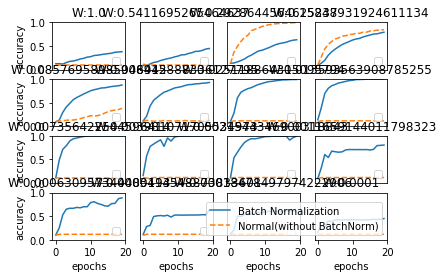

In [11]:
#@title 6.3 Batch Normalization

# coding: utf-8
import sys, os
sys.path.append('deep-learning-from-scratch')  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 学習データを削減
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 3.グラフの描画==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()


epoch:0, train acc:0.13, test acc:0.113
epoch:1, train acc:0.13, test acc:0.1196
epoch:2, train acc:0.14, test acc:0.1241
epoch:3, train acc:0.16666666666666666, test acc:0.1383
epoch:4, train acc:0.18, test acc:0.1498
epoch:5, train acc:0.19, test acc:0.1571
epoch:6, train acc:0.19333333333333333, test acc:0.1694
epoch:7, train acc:0.21, test acc:0.1781
epoch:8, train acc:0.23666666666666666, test acc:0.191
epoch:9, train acc:0.23666666666666666, test acc:0.198
epoch:10, train acc:0.2966666666666667, test acc:0.2272
epoch:11, train acc:0.3333333333333333, test acc:0.2488
epoch:12, train acc:0.3566666666666667, test acc:0.2619
epoch:13, train acc:0.37333333333333335, test acc:0.2827
epoch:14, train acc:0.41333333333333333, test acc:0.2993
epoch:15, train acc:0.4266666666666667, test acc:0.3059
epoch:16, train acc:0.43666666666666665, test acc:0.3205
epoch:17, train acc:0.45, test acc:0.3308
epoch:18, train acc:0.49333333333333335, test acc:0.3579
epoch:19, train acc:0.5033333333333333,

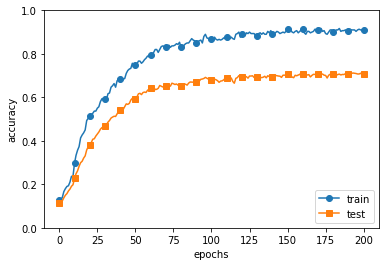

In [12]:
#@title 6.4.1 過学習

# coding: utf-8
import os
import sys

sys.path.append('deep-learning-from-scratch')  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
#weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


In [0]:
#@title 6.4.2 Weight decay

# coding: utf-8
import sys, os
sys.path.append('deep-learning-from-scratch')  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient


class MultiLayerNet:
    """全結合による多層ニューラルネットワーク
    Parameters
    ----------
    input_size : 入力サイズ（MNISTの場合は784）
    hidden_size_list : 隠れ層のニューロンの数のリスト（e.g. [100, 100, 100]）
    output_size : 出力サイズ（MNISTの場合は10）
    activation : 'relu' or 'sigmoid'
    weight_init_std : 重みの標準偏差を指定（e.g. 0.01）
        'relu'または'he'を指定した場合は「Heの初期値」を設定
        'sigmoid'または'xavier'を指定した場合は「Xavierの初期値」を設定
    weight_decay_lambda : Weight Decay（L2ノルム）の強さ
    """
    def __init__(self, input_size, hidden_size_list, output_size,
                 activation='relu', weight_init_std='relu', weight_decay_lambda=0):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size_list = hidden_size_list
        self.hidden_layer_num = len(hidden_size_list)
        self.weight_decay_lambda = weight_decay_lambda
        self.params = {}

        # 重みの初期化
        self.__init_weight(weight_init_std)

        # レイヤの生成
        activation_layer = {'sigmoid': Sigmoid, 'relu': Relu}
        self.layers = OrderedDict()
        for idx in range(1, self.hidden_layer_num+1):
            self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)],
                                                      self.params['b' + str(idx)])
            self.layers['Activation_function' + str(idx)] = activation_layer[activation]()

        idx = self.hidden_layer_num + 1
        self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)],
            self.params['b' + str(idx)])

        self.last_layer = SoftmaxWithLoss()

    def __init_weight(self, weight_init_std):
        """重みの初期値設定
        Parameters
        ----------
        weight_init_std : 重みの標準偏差を指定（e.g. 0.01）
            'relu'または'he'を指定した場合は「Heの初期値」を設定
            'sigmoid'または'xavier'を指定した場合は「Xavierの初期値」を設定
        """
        all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
        for idx in range(1, len(all_size_list)):
            scale = weight_init_std
            if str(weight_init_std).lower() in ('relu', 'he'):
                scale = np.sqrt(2.0 / all_size_list[idx - 1])  # ReLUを使う場合に推奨される初期値
            elif str(weight_init_std).lower() in ('sigmoid', 'xavier'):
                scale = np.sqrt(1.0 / all_size_list[idx - 1])  # sigmoidを使う場合に推奨される初期値

            self.params['W' + str(idx)] = scale * np.random.randn(all_size_list[idx-1], all_size_list[idx])
            self.params['b' + str(idx)] = np.zeros(all_size_list[idx])

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """損失関数を求める
        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル
        Returns
        -------
        損失関数の値
        """
        y = self.predict(x)

        weight_decay = 0
        for idx in range(1, self.hidden_layer_num + 2):
            W = self.params['W' + str(idx)]
            weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W ** 2)

        return self.last_layer.forward(y, t) + weight_decay

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        """勾配を求める（数値微分）
        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル
        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = numerical_gradient(loss_W, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_W, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """勾配を求める（誤差逆伝搬法）
        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル
        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = self.layers['Affine' + str(idx)].dW + self.weight_decay_lambda * self.layers['Affine' + str(idx)].W
            grads['b' + str(idx)] = self.layers['Affine' + str(idx)].db

        return grads


epoch:0, train acc:0.09666666666666666, test acc:0.1048
epoch:1, train acc:0.10333333333333333, test acc:0.1077
epoch:2, train acc:0.11666666666666667, test acc:0.1111
epoch:3, train acc:0.13333333333333333, test acc:0.1201
epoch:4, train acc:0.15333333333333332, test acc:0.133
epoch:5, train acc:0.16666666666666666, test acc:0.1444
epoch:6, train acc:0.19333333333333333, test acc:0.1603
epoch:7, train acc:0.22333333333333333, test acc:0.1747
epoch:8, train acc:0.25, test acc:0.1905
epoch:9, train acc:0.26666666666666666, test acc:0.1987
epoch:10, train acc:0.27666666666666667, test acc:0.2093
epoch:11, train acc:0.2866666666666667, test acc:0.2174
epoch:12, train acc:0.2966666666666667, test acc:0.2236
epoch:13, train acc:0.30666666666666664, test acc:0.228
epoch:14, train acc:0.31, test acc:0.2289
epoch:15, train acc:0.31666666666666665, test acc:0.2302
epoch:16, train acc:0.31666666666666665, test acc:0.238
epoch:17, train acc:0.31666666666666665, test acc:0.2446
epoch:18, train acc

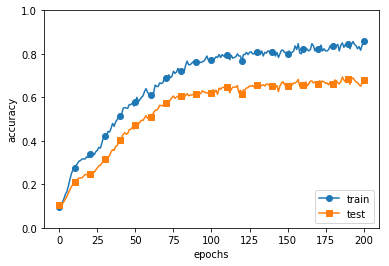

In [15]:
# coding: utf-8
import os
import sys

sys.path.append('deep-learning-from-scratch')  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
#weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

train loss:2.323948062027692
=== epoch:1, train acc:0.07666666666666666, test acc:0.0894 ===
train loss:2.330361395135365
train loss:2.3089177169697304
train loss:2.285263779072046
=== epoch:2, train acc:0.07666666666666666, test acc:0.0896 ===
train loss:2.3109242726160413
train loss:2.3107104799541616
train loss:2.3243625132778374
=== epoch:3, train acc:0.07666666666666666, test acc:0.0898 ===
train loss:2.310237792921031
train loss:2.3237654259152647
train loss:2.281180541852445
=== epoch:4, train acc:0.07666666666666666, test acc:0.0901 ===
train loss:2.3049479571974834
train loss:2.310783799911484
train loss:2.30050437534296
=== epoch:5, train acc:0.07666666666666666, test acc:0.0904 ===
train loss:2.3243990649878277
train loss:2.318745687696626
train loss:2.2849056243320534
=== epoch:6, train acc:0.07666666666666666, test acc:0.0907 ===
train loss:2.299089881191798
train loss:2.28925142019409
train loss:2.2850311616127916
=== epoch:7, train acc:0.07333333333333333, test acc:0.091

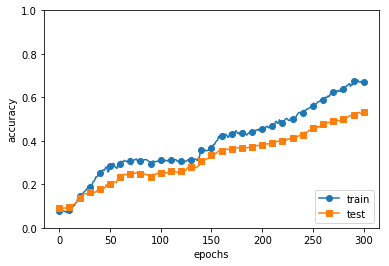

In [16]:
#@title 6.4.3 DropOut
# coding: utf-8
import os
import sys
sys.path.append('deep-learning-from-scratch')  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# Dropuoutの有無、割り合いの設定 ========================
use_dropout = True  # Dropoutなしのときの場合はFalseに
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

val acc:0.41 | lr:0.002868052010194971, weight decay:7.488808545735291e-07
val acc:0.12 | lr:1.49971797346418e-05, weight decay:1.6066056825313496e-06
val acc:0.11 | lr:0.0006000243404229796, weight decay:2.4482452708218775e-08
val acc:0.16 | lr:0.0008772854868796502, weight decay:2.4015937380113627e-05
val acc:0.25 | lr:0.0007550146914127724, weight decay:1.6231432226849952e-08
val acc:0.11 | lr:4.982485886176661e-06, weight decay:8.26607829796543e-06
val acc:0.05 | lr:1.5182786890192842e-05, weight decay:4.6569338531560154e-07
val acc:0.04 | lr:0.00016397849687527842, weight decay:3.299981309388098e-07
val acc:0.05 | lr:7.800312368009071e-06, weight decay:1.5250834796166953e-07
val acc:0.15 | lr:1.8464848916703912e-05, weight decay:3.4288373867752634e-06
val acc:0.2 | lr:4.395168669731546e-06, weight decay:1.9887792927835697e-05
val acc:0.16 | lr:4.570215982248857e-06, weight decay:1.0160861614626315e-05
val acc:0.06 | lr:1.2702897853033617e-06, weight decay:9.930939217621575e-06
val

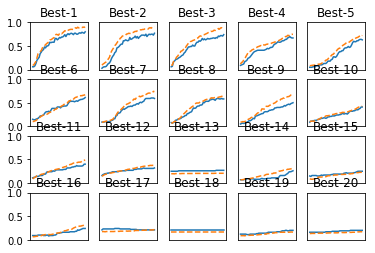

In [17]:
# coding: utf-8
import sys, os
sys.path.append('deep-learning-from-scratch')  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 高速化のため訓練データの削減
x_train = x_train[:500]
t_train = t_train[:500]

# 検証データの分離
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# ハイパーパラメータのランダム探索======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 探索したハイパーパラメータの範囲を指定===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# グラフの描画========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()